<a href="https://colab.research.google.com/github/theplace75/Section_project1/blob/main/AI_13_%EC%B1%84%EB%B3%91%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음 분기에 어떤 게임을 설계해야 할까
를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

채병관님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 채병관님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 채병관님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 채병관님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df = df.drop(columns = ['Unnamed: 0']) #unnamed 삭제 (1번만 실행)
df #데이터 불러오기

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   
16597                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
0         Action                    Destineer     0.04        0        0   
1         Action           Namco Bandai Games     0.17        0        0   
2      Adventure                    Alchemist        0        0     0.02   
3           Misc                    Zoo Games     0.04        0        0   
4       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16593   Platform                Vivendi Games     0.15     0.04        0   
16594     Action            Rising Star Games     0.01        0        0   
16595     Sports         Take-Two Interactive     0.44     0.19     0.03   
16596     Action                   Tecmo Koei     0.05     0.05     0.25   
16597   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
0               0  
1            0.01  
2               0  
3               0  
4            0.04  
...           ...  
16593        0.01  
16594           0  
16595        0.13  
16596        0.03  
16597        0.01  

[16598 rows x 9 columns]

캡처.PNG

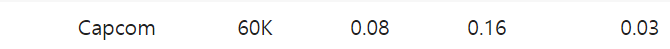

EDA 전처리


In [ ]:
# K와 M 값이 포함 돼 있어서 숫자형으로 진행되는 분석에 문제가 생길 수 있으며 그 값이 많지 않으므로 삭제하겠습니다.
#drop_KM = df[df['NA_Sales'].str.contains('K')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['EU_Sales'].str.contains('M')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['EU_Sales'].str.contains('K')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['NA_Sales'].str.contains('M')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['JP_Sales'].str.contains('K')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['JP_Sales'].str.contains('M')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['Other_Sales'].str.contains('K')].index
#df.drop(drop_KM, inplace=True)
#drop_KM = df[df['Other_Sales'].str.contains('M')].index
#df.drop(drop_KM, inplace=True)
#df

In [ ]:
df = df.fillna(0)

def KM_ (sales):
  if 'K' in sales:
    sales = sales.replace('K','')
    return float(sales) / 1000
  elif 'M' in sales:
    sales = sales.replace('M','')
    return float(sales)
  return float(sales)
  
df['NA_Sales'] = df['NA_Sales'].apply(KM_)
df['EU_Sales'] = df['EU_Sales'].apply(KM_)
df['JP_Sales'] = df['JP_Sales'].apply(KM_)
df['Other_Sales'] = df['Other_Sales'].apply(KM_)

In [ ]:
df = df.astype({'Year':'float'})
df = df.astype({'NA_Sales':'float'})
df = df.astype({'EU_Sales':'float'})
df = df.astype({'JP_Sales':'float'})
df = df.astype({'Other_Sales':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


EDA *전처리*

In [ ]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 100):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16593                         Ice Age 2: The Meltdown       GC  2006   
16594                     Rainbow Islands: Revolution      PSP  2005   
16595                                        NBA 2K16      PS3  2015   
16596                     Toukiden: The Age of Demons      PSV  2013   
16597                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16593   Platform                Vivendi Games      0.15      0.04      0.00   
16594     Action            Rising Star Games      0.01      0.00      0.00   
16595     Sports         Take-Two Interactive      0.44      0.19      0.03   
16596     Action                   Tecmo Koei      0.05      0.05      0.25   
16597   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  
0             0.00  
1             0.01  
2             0.00  
3             0.00  
4             0.04  
...            ...  
16593         0.01  
16594         0.00  
16595         0.13  
16596         0.03  
16597         0.01  

[16598 rows x 9 columns]

In [ ]:
df['All_Sales']= df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   
16597                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
0         Action                    Destineer     0.04        0        0   
1         Action           Namco Bandai Games     0.17        0        0   
2      Adventure                    Alchemist        0        0     0.02   
3           Misc                    Zoo Games     0.04        0        0   
4       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16593   Platform                Vivendi Games     0.15     0.04        0   
16594     Action            Rising Star Games     0.01        0        0   
16595     Sports         Take-Two Interactive     0.44     0.19     0.03   
16596     Action                   Tecmo Koei     0.05     0.05     0.25   
16597   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales         All_Sales  
0               0           0.04000  
1            0.01        0.17000.01  
2               0           000.020  
3               0           0.04000  
4            0.04     0.120.0900.04  
...           ...               ...  
16593        0.01     0.150.0400.01  
16594           0           0.01000  
16595        0.13  0.440.190.030.13  
16596        0.03  0.050.050.250.03  
16597        0.01        000.160.01  

[16598 rows x 10 columns]

In [ ]:
howmany = df['Genre'].unique() #플랫폼 31개 출시 기업564개 장르 12개
print(len(howmany))
howmany

13


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', 0], dtype=object)

In [ ]:

howmany = df['Platform'].unique() # Year, Genre, Publisher
print(len(howmany))
howmany

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

In [ ]:
df1 = pd.DataFrame(df, columns = ['Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','All_Sales'])
df1

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  All_Sales
0         Action      0.04      0.00      0.00         0.00       0.04
1         Action      0.17      0.00      0.00         0.01       0.18
2      Adventure      0.00      0.00      0.02         0.00       0.02
3           Misc      0.04      0.00      0.00         0.00       0.04
4       Platform      0.12      0.09      0.00         0.04       0.25
...          ...       ...       ...       ...          ...        ...
16593   Platform      0.15      0.04      0.00         0.01       0.20
16594     Action      0.01      0.00      0.00         0.00       0.01
16595     Sports      0.44      0.19      0.03         0.13       0.79
16596     Action      0.05      0.05      0.25         0.03       0.38
16597   Fighting      0.00      0.00      0.16         0.01       0.17

[16598 rows x 6 columns]

In [ ]:

df_genre = df.groupby(by=['Genre'])['All_Sales'].sum() 
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum()
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum()
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum()
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum()
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

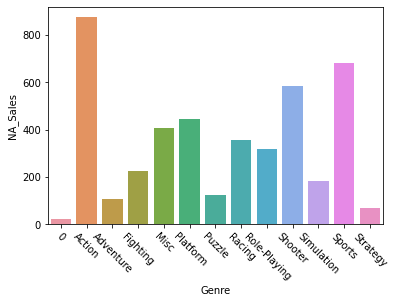

In [ ]:
plt.xticks(rotation = - 45 )
sns.barplot(data=df_genre_na, x="Genre", y="NA_Sales")

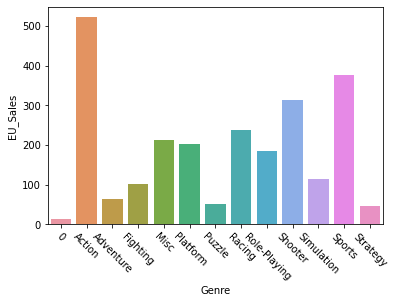

In [ ]:
plt.xticks(rotation = - 45 )
sns.barplot(data=df_genre_eu, x="Genre", y="EU_Sales")

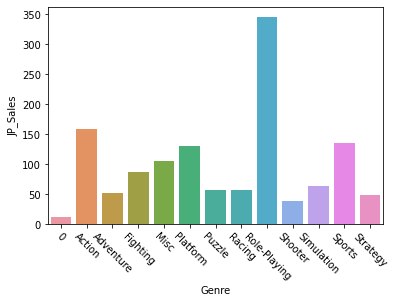

In [ ]:
plt.xticks(rotation = - 45 )
sns.barplot(data=df_genre_jp, x="Genre", y="JP_Sales")

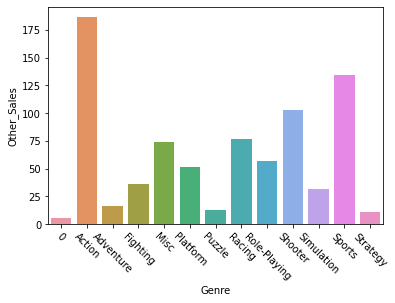

In [ ]:
plt.xticks(rotation = - 45 )
sns.barplot(data=df_genre_ot, x="Genre", y="Other_Sales")

예 지역에 따라 선호하는 게임 장르가 달라집니다. 우선 데이터를 분석해보면

1. 인기가 많은 게임 순위는 1위 Action 2위 Sports 3위 Shooter 순위이다.
(게임의 질에 자신이 있다면 인기가 있는 Action 종류의 게임을 제작하고 차별화 되는 점이 없다면 쉽게 묻힐 수 있기 때문에 다른 장르의 게임 제작하는것이 좋아 보입니다.

2. 일본의 경우 'Role-Playing'장르가 가장 많은 판매량을 보이고 있다.

이를 통해 일본을 제외한 곳에서는 1위 Action 2위 Sports 3위 Shooter 의 양상을 보이지만 일본의 경우는 'Role-Playing' 가장 많은 판매량을 보입니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.


In [ ]:
df2 = pd.DataFrame(df, columns = ['Year', 'Genre', 'All_Sales'])
df2 = df2.sort_values(by=['Year'])
df2.tail(350) # 16년부터 20년까지 데이터 약 350개밖에 없음 그래프 보고 삭제할지 판단

Year         Genre  All_Sales
15244  2015        Action       0.13
1644   2015        Action       0.05
16337  2016        Sports       1.53
9164   2016     Adventure       0.02
9083   2016        Action       0.55
...     ...           ...        ...
6192   2016        Action       0.01
10107  2017  Role-Playing       0.03
15233  2017  Role-Playing       0.01
5310   2017        Action       0.01
6906   2020    Simulation       0.29

[350 rows x 3 columns]

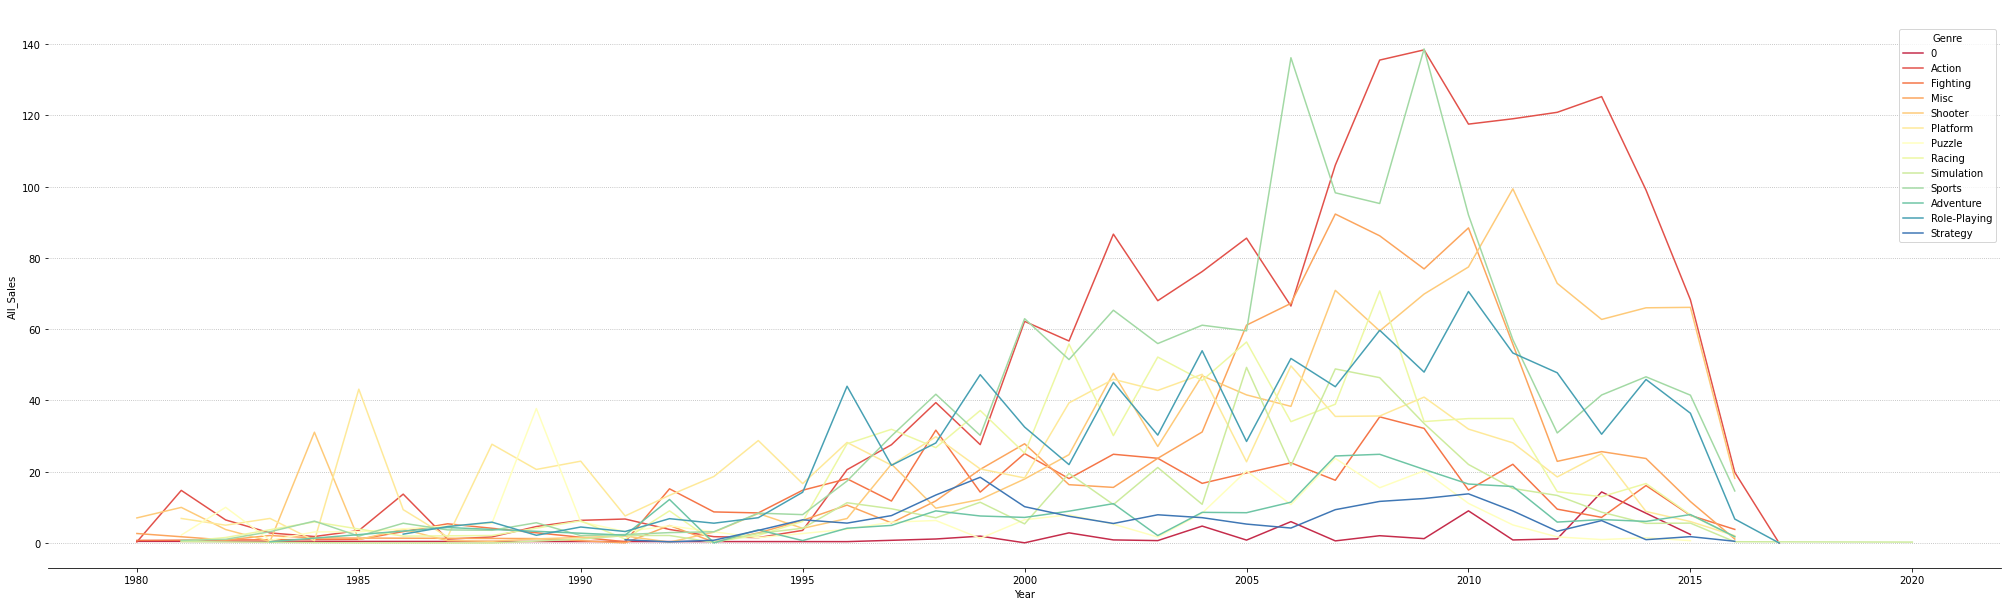

In [ ]:
df2 
df2_max = df2.groupby(['Year','Genre'])['All_Sales'].sum().reset_index()

# lineplot

plt.figure(figsize = (35, 10))
sns.lineplot(x = 'Year', y = 'All_Sales',hue ='Genre', data=df2_max, palette='Spectral')
plt.title('   ', size=15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')
plt.show()

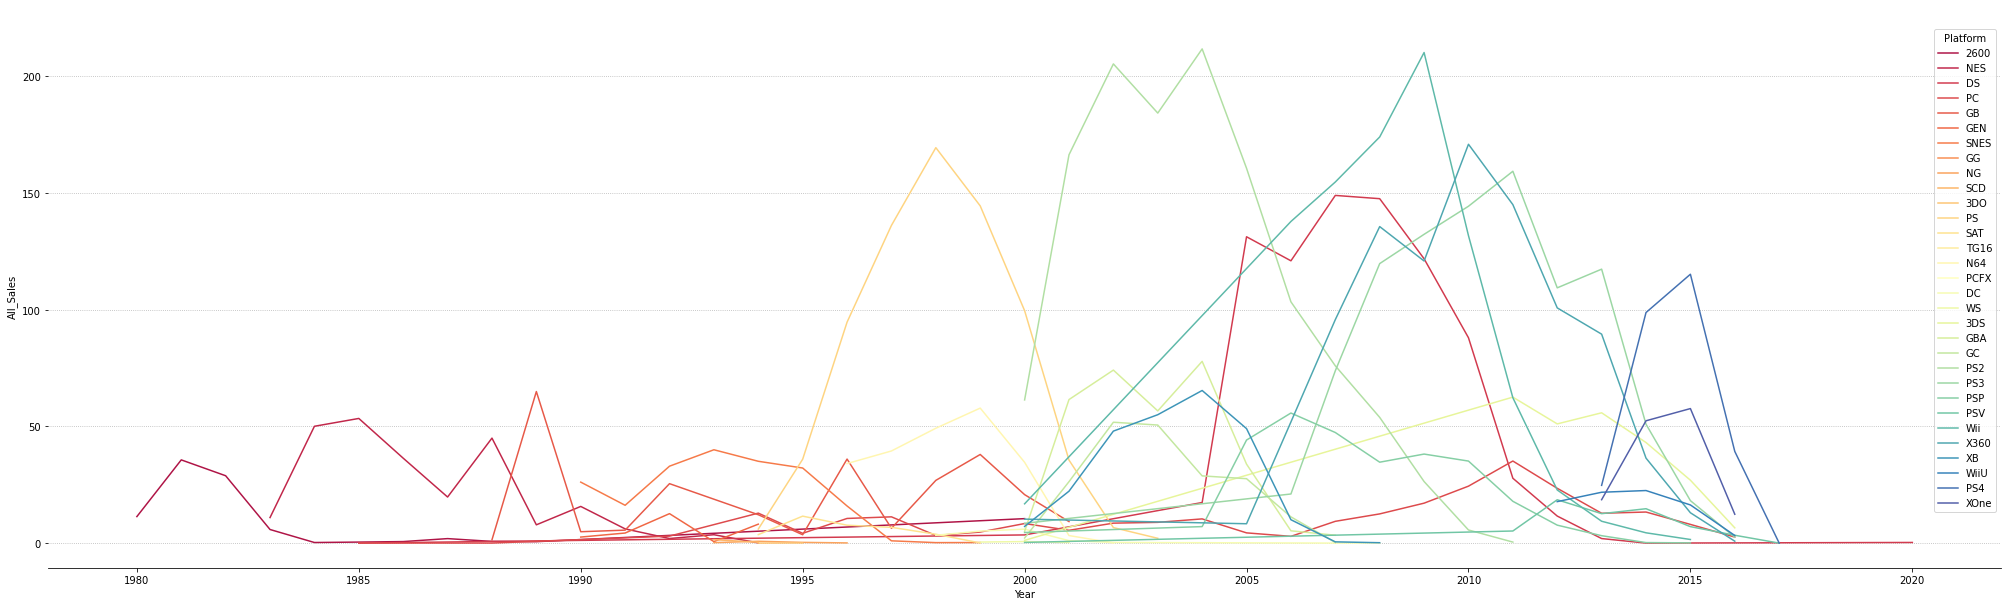

In [ ]:
df2 = pd.DataFrame(df, columns = ['Year', 'Platform', 'All_Sales'])
df2 = df2.sort_values(by=['Year'])
df2_max = df2.groupby(['Year','Platform'])['All_Sales'].sum().reset_index()

# lineplot

plt.figure(figsize = (35, 10))
sns.lineplot(x = 'Year', y = 'All_Sales',hue ='Platform', data=df2_max, palette='Spectral')
plt.title('   ', size=15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')
plt.show()

In [ ]:
#2016년 부터는 통계량이 매우 부족해 의미있는 데이터 분석 불가능하다고 판단

df2_for_drop= df2[df2['Year']>= 2016].index
df2 = df2.drop(df2_for_drop)
df2

Year     Genre  All_Sales
14264  1980  Fighting       0.77
12314  1980         0       0.50
7317   1980      Misc       0.23
15012  1980   Shooter       2.76
10121  1980      Misc       1.05
...     ...       ...        ...
11678  2015    Action       0.06
11826  2015    Action       0.11
11751  2015      Misc       0.37
15244  2015    Action       0.13
1644   2015    Action       0.05

[16250 rows x 3 columns]

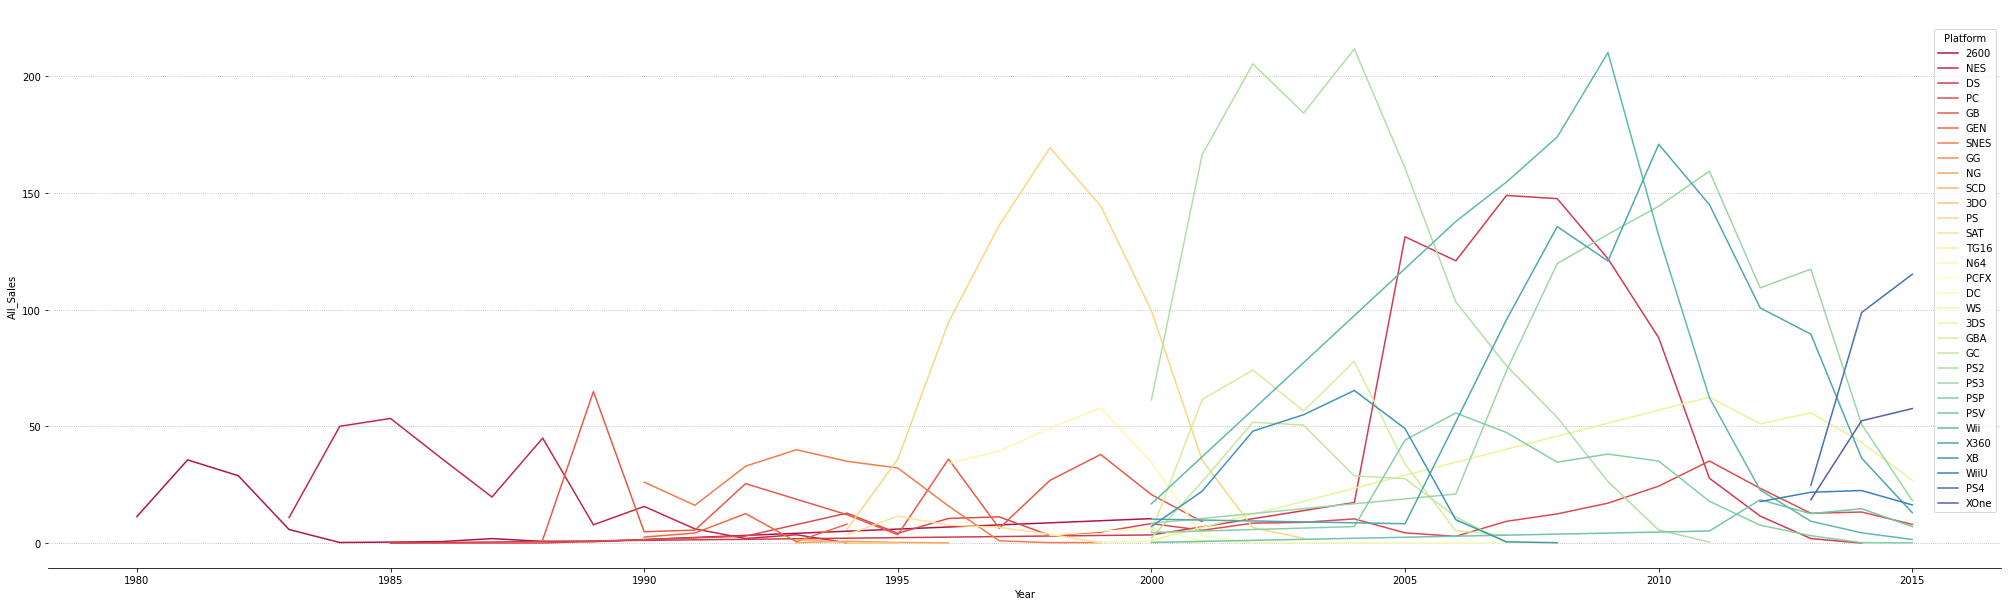

In [ ]:
df2_max = df2.groupby(['Year','Platform'])['All_Sales'].sum().reset_index()

plt.figure(figsize = (35, 10))
sns.lineplot(x = 'Year', y = 'All_Sales',hue ='Platform', data=df2_max, palette='Spectral')
plt.title('   ', size=15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')
plt.show()

In [ ]:
df2 = pd.DataFrame(df, columns = ['Year', 'Genre', 'All_Sales'])
df2 = df2.sort_values(by=['Year'])
df2_for_drop= df2[df2['Year']>= 2016].index
df2 = df2.drop(df2_for_drop)
df2

Year     Genre  All_Sales
14264  1980  Fighting       0.77
12314  1980         0       0.50
7317   1980      Misc       0.23
15012  1980   Shooter       2.76
10121  1980      Misc       1.05
...     ...       ...        ...
11678  2015    Action       0.06
11826  2015    Action       0.11
11751  2015      Misc       0.37
15244  2015    Action       0.13
1644   2015    Action       0.05

[16250 rows x 3 columns]

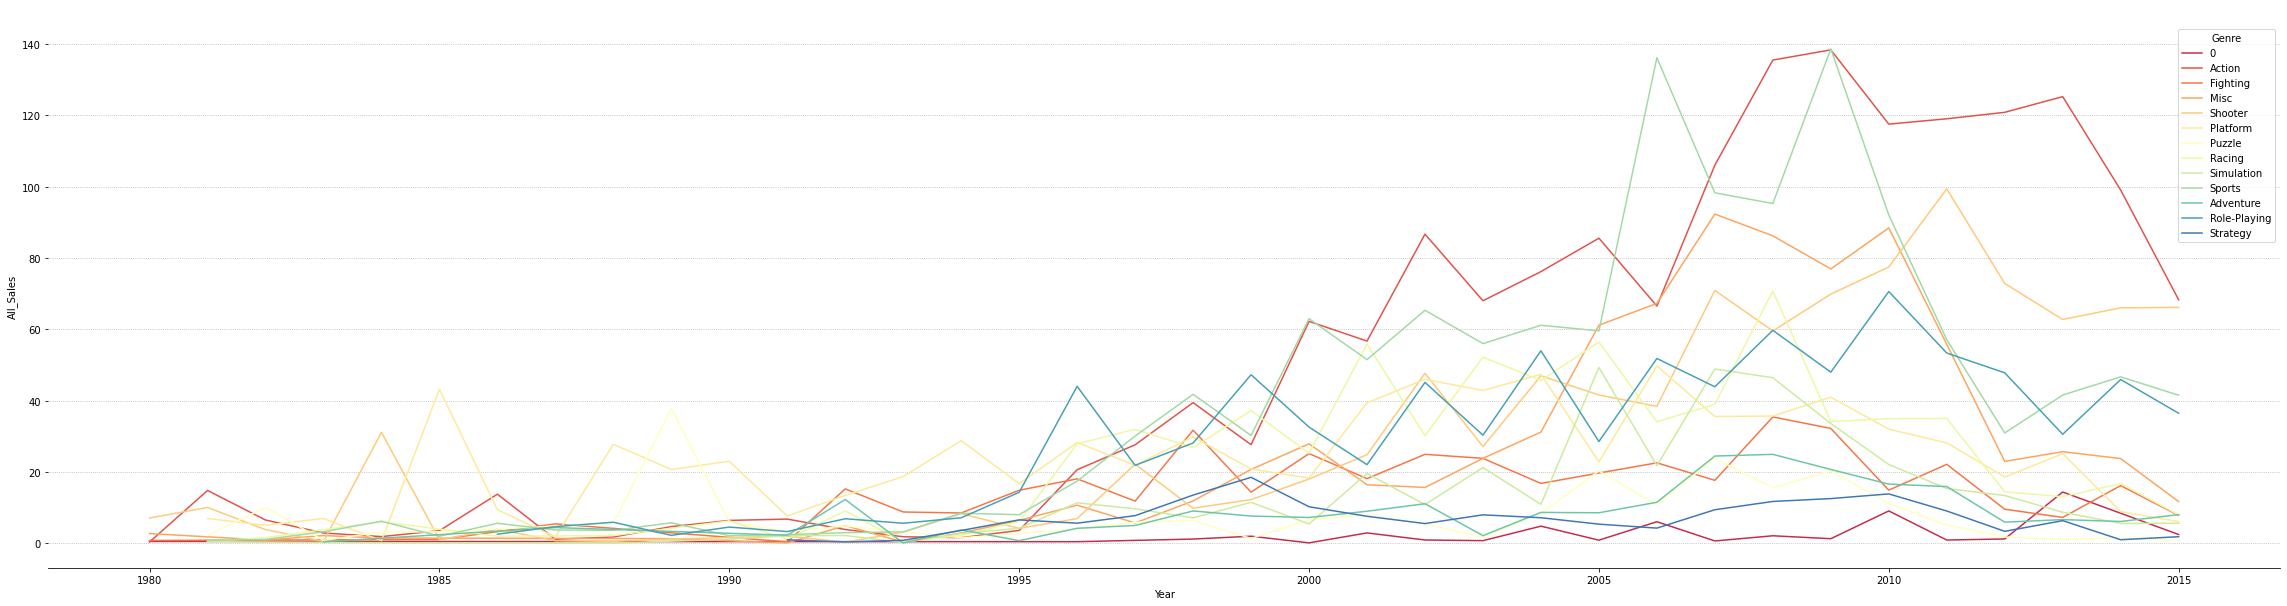

In [ ]:
df2_max = df2.groupby(['Year','Genre'])['All_Sales'].sum().reset_index()

# lineplot

plt.figure(figsize = (40, 10))
sns.lineplot(x = 'Year', y = 'All_Sales',hue ='Genre', data=df2_max, palette='Spectral')
plt.title('   ', size=15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')
plt.show()

게임시장의 파이는 커지는 우상향 그래프를 그린다.

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
있습니다. 
1980 ~ 84
1985 ~ 89


3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [ ]:
df3 = pd.DataFrame(df, columns = ['Name','Platform', 'Year', 'Genre','All_Sales'])
df3 = df3.sort_values(by=['Year'])
df3

Name Platform  Year  \
14264                                            Boxing     2600  1980   
12314                                        Ice Hockey     2600  1980   
7317                                           Checkers     2600  1980   
15012                                   Missile Command     2600  1980   
10121                                          Defender     2600  1980   
...                                                 ...      ...   ...   
6192                Azure Striker Gunvolt: Striker Pack      3DS  2016   
10107  Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017   
15233  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV  2017   
5310                   Brothers Conflict: Precious Baby      PSV  2017   
6906                             Imagine: Makeup Artist       DS  2020   

              Genre  All_Sales  
14264      Fighting       0.77  
12314             0       0.50  
7317           Misc       0.23  
15012       Shooter       2.76  
10121          Misc       1.05  
...             ...        ...  
6192         Action       0.01  
10107  Role-Playing       0.03  
15233  Role-Playing       0.01  
5310         Action       0.01  
6906     Simulation       0.29  

[16598 rows x 5 columns]

In [ ]:
df3_top = df3.loc[df3.All_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
df3_top['rank'] = rank
df3_top # 닌텐도와 마리오 ip가 큰 사랑을 받았다는 것을 알 수 있다
#새로 출시할 게임을 위한 정보분석으로는 적절치 않다. (고전 게임도 포함 돼 있음)

Name Platform  Year         Genre  All_Sales  rank
0                 Wii Sports      Wii  2006        Sports      82.74   1 위
1          Super Mario Bros.      NES  1985      Platform      40.24   2 위
2             Mario Kart Wii      Wii  2008        Racing      35.83   3 위
3          Wii Sports Resort      Wii  2009        Sports      33.00   4 위
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing      31.38   5 위
5                     Tetris       GB  1989        Puzzle      30.26   6 위
6      New Super Mario Bros.       DS  2006      Platform      30.01   7 위
7                   Wii Play      Wii  2006          Misc      29.01   8 위
8  New Super Mario Bros. Wii      Wii  2009      Platform      28.61   9 위
9                  Duck Hunt      NES  1984       Shooter      28.31  10 위

In [ ]:
df3_for_drop= df3[df3['Year']>= 2016].index
df3 = df3.drop(df3_for_drop)
df3_for_drop= df3[df3['Year']<= 2010].index
df3 = df3.drop(df3_for_drop)
df3_top = df3.loc[df3.All_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
df3_top['rank'] = rank
df3_top 

Name Platform  Year    Genre  All_Sales  rank
0              Grand Theft Auto V      PS3  2013   Action      21.39   1 위
1              Grand Theft Auto V     X360  2013   Action      16.38   2 위
2  Call of Duty: Modern Warfare 3     X360  2011  Shooter      14.76   3 위
3             Pokemon X/Pokemon Y      3DS  2013        0      14.35   4 위
4       Call of Duty: Black Ops 3      PS4  2015  Shooter      14.24   5 위
5      Call of Duty: Black Ops II      PS3  2012  Shooter      14.04   6 위
6      Call of Duty: Black Ops II     X360  2012  Shooter      13.74   7 위
7  Call of Duty: Modern Warfare 3      PS3  2011  Shooter      13.47   8 위
8                    Mario Kart 7      3DS  2011   Racing      12.21   9 위
9              Grand Theft Auto V      PS4  2014   Action      11.99  10 위

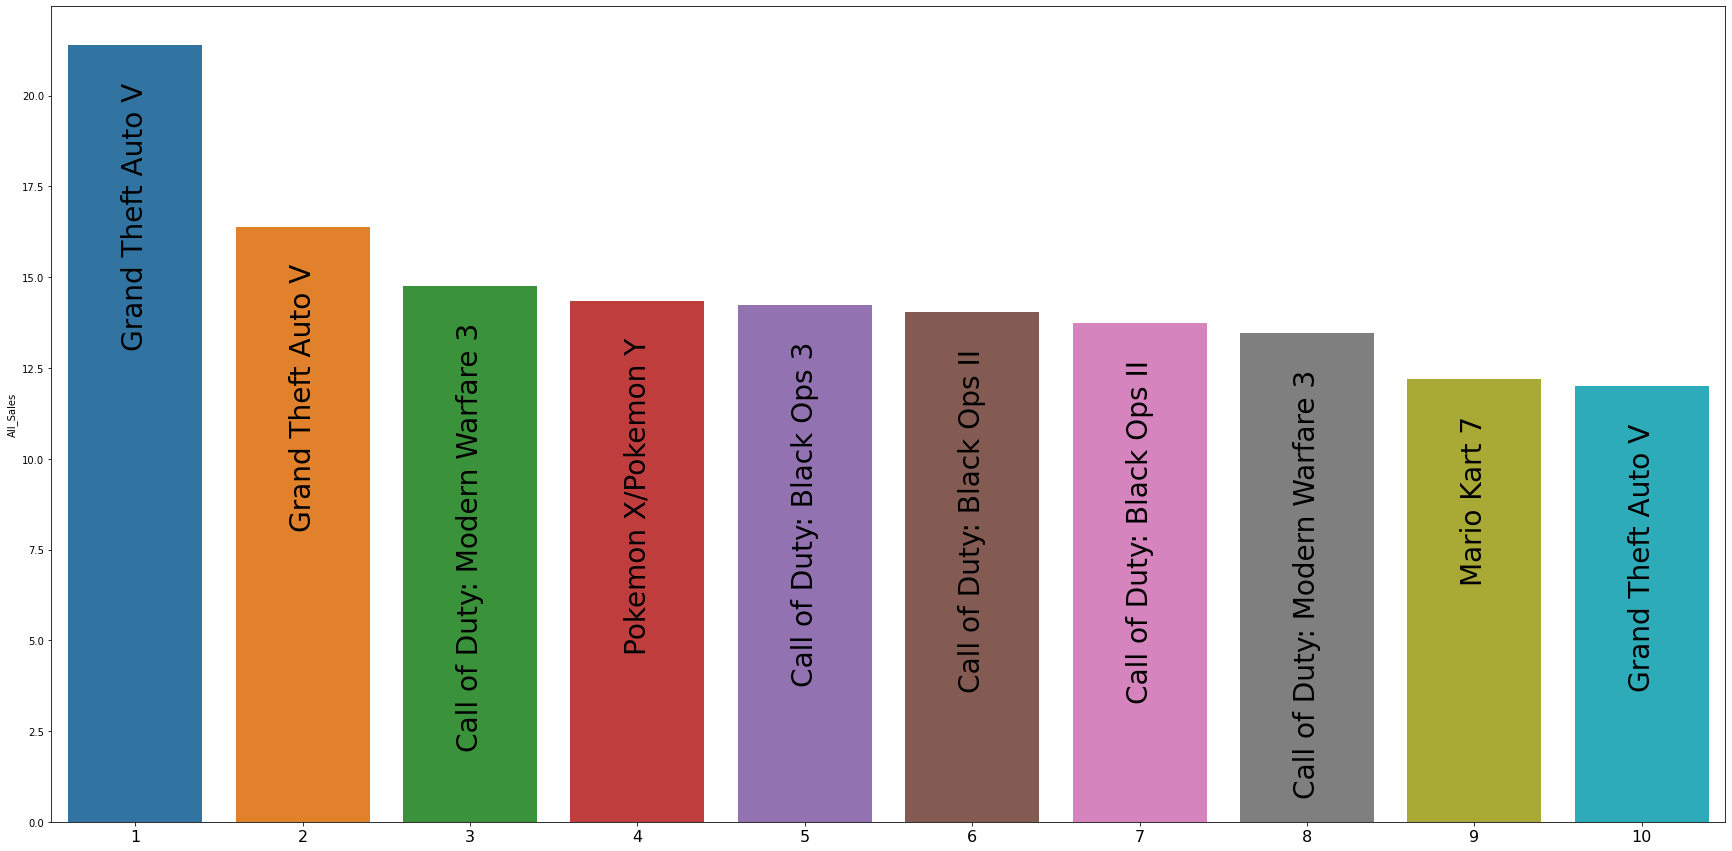

In [ ]:
plt.figure(figsize=(30, 15))
a = sns.barplot(x = df3_top.index, y='All_Sales', data=df3_top)
i = 0
for name, val in zip(df3_top.Name, df3_top.All_Sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=28, rotation=90)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=28, rotation=90)
    
    i+=1
a.set_title('', fontsize=30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x) for x in range(1, 11)], fontsize=16)
plt.show() #gta게임이 2011~2015년 사이에 많은 사랑을 받았다는걸 알 수 있습니다. Gta에대한 분석을 해보겠습니다.

In [ ]:
df_gta = pd.DataFrame(df, columns = ['Name','Platform', 'Year', 'Genre','All_Sales'])	
df_gta = df[df['Name'].str.contains('Grand Theft Auto')]
df_gta = df_gta.sort_values(by=['Year'])
df_gta

Name Platform  Year  \
13778                                   Grand Theft Auto       PS  1997   
955       Grand Theft Auto: Mission Pack #1, London 1969       PS  1998   
13785                                 Grand Theft Auto 2       PS  1998   
9786                                Grand Theft Auto III      PS2  2001   
5396                                Grand Theft Auto III       PC  2002   
5340                         Grand Theft Auto: Vice City      PS2  2002   
2079                         Grand Theft Auto: Vice City       PC  2003   
3447   Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003   
5267   Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003   
14669                      Grand Theft Auto: San Andreas      PS2  2004   
5697                                    Grand Theft Auto      GBA  2004   
6060                       Grand Theft Auto: San Andreas       PC  2005   
761               Grand Theft Auto: Liberty City Stories      PSP  2005   
10420                      Grand Theft Auto: San Andreas       XB  2005   
6606                 Grand Theft Auto: Vice City Stories      PSP  2006   
5318              Grand Theft Auto: Liberty City Stories      PS2  2006   
797                  Grand Theft Auto: Vice City Stories      PS2  2007   
16475                                Grand Theft Auto IV      PS3  2008   
4148                                 Grand Theft Auto IV       PC  2008   
3632                       Grand Theft Auto: San Andreas     X360  2008   
13926                                Grand Theft Auto IV     X360  2008   
5662                    Grand Theft Auto: Chinatown Wars       DS  2009   
7010                    Grand Theft Auto: Chinatown Wars      PSP  2009   
3483                                  Grand Theft Auto V      PS3  2013   
10913                                 Grand Theft Auto V     X360  2013   
10834                                 Grand Theft Auto V     XOne  2014   
2008                                  Grand Theft Auto V      PS4  2014   
16575                                 Grand Theft Auto V       PC  2015   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
13778     Action  Take-Two Interactive      0.79      1.35      0.04   
955    Adventure  Take-Two Interactive      0.06      0.04      0.00   
13785     Action  Take-Two Interactive      1.13      2.07      0.00   
9786      Action  Take-Two Interactive      6.99      4.51      0.30   
5396      Action  Take-Two Interactive      0.00      0.01      0.00   
5340      Action  Take-Two Interactive      8.41      5.49      0.47   
2079      Action  Take-Two Interactive      0.00      0.03      0.00   
3447      Action  Take-Two Interactive      0.85      0.66      0.00   
5267      Action  Take-Two Interactive      1.84      0.56      0.00   
14669     Action  Take-Two Interactive      9.43      0.40      0.41   
5697      Action  Take-Two Interactive      0.17      0.06      0.00   
6060      Action  Take-Two Interactive      0.00      0.92      0.00   
761       Action  Take-Two Interactive      2.90      2.83      0.24   
10420     Action  Take-Two Interactive      1.26      0.61      0.00   
6606      Action  Take-Two Interactive      1.70      2.02      0.16   
5318      Action  Take-Two Interactive      1.56      1.40      0.07   
797       Action  Take-Two Interactive      0.78      0.03      0.03   
16475     Action  Take-Two Interactive      4.76      3.76      0.44   
4148           0  Take-Two Interactive      0.01      0.79      0.00   
3632      Action  Take-Two Interactive      0.08      0.03      0.00   
13926     Action  Take-Two Interactive      6.76      3.10      0.14   
5662      Action  Take-Two Interactive      0.59      0.57      0.05   
7010      Action  Take-Two Interactive      0.28      0.50      0.03   
3483      Action  Take-Two Interactive      7.01      9.27      0.97   
10913     Action  Take-Two Interactive      9.63      5.31      0.06   
1083

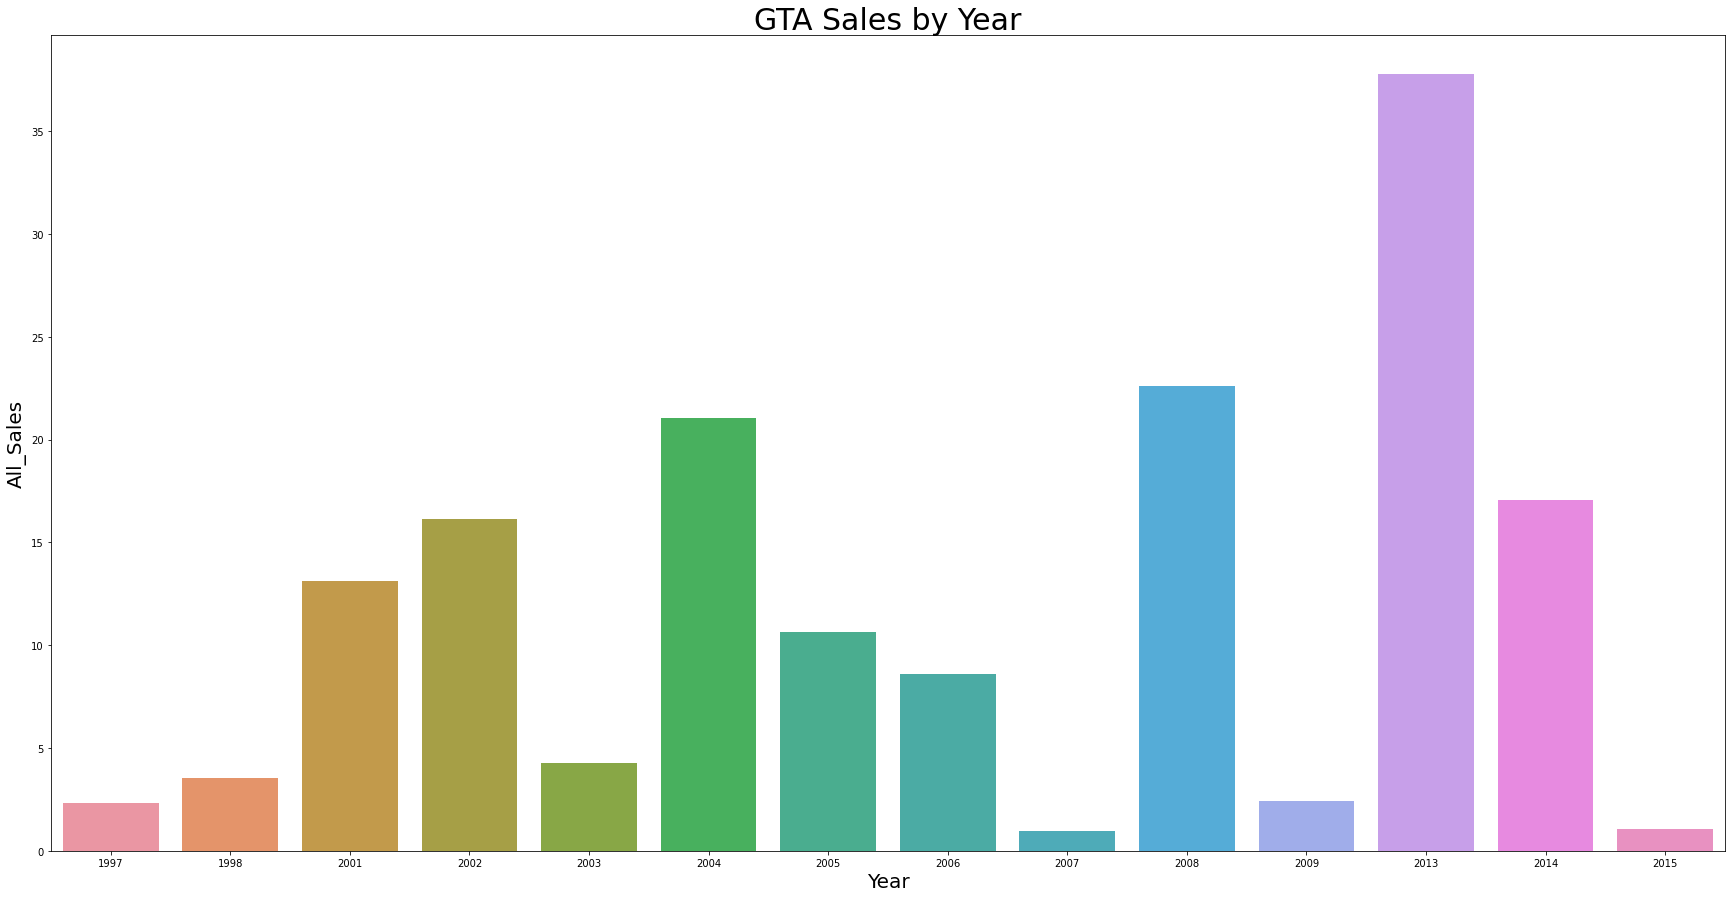

In [ ]:
gtayear = df_gta.groupby('Year').sum()
gtayear = gtayear[['All_Sales']]
gtayear = gtayear.reset_index()
gtayear
plt.figure(figsize=(30, 15))
plt.title("GTA Sales by Year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Year', y='All_Sales', data=gtayear); #gta시리즈는 1997년부터 꾸준히 사랑받아 왔다.

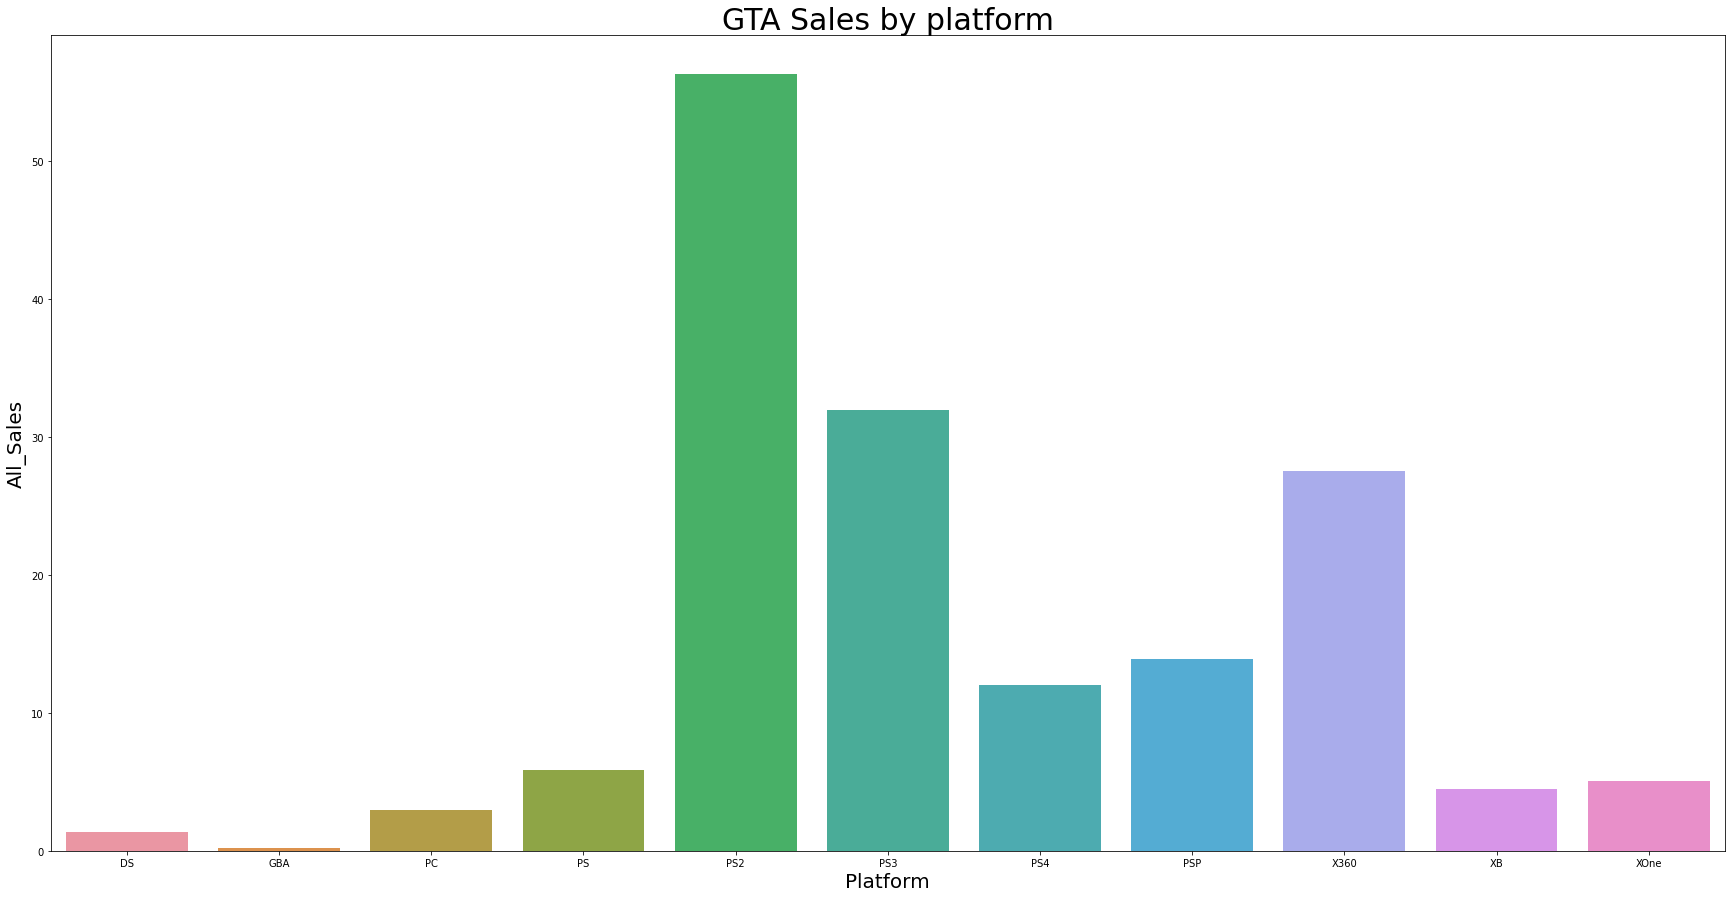

In [ ]:
gtaplatform = df_gta.groupby('Platform').sum()
gtaplatform = gtaplatform[['All_Sales']]
gtaplatform = gtaplatform.reset_index()
gtaplatform
plt.figure(figsize=(30, 15))
plt.title("GTA Sales by platform", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(x='Platform', y='All_Sales', data=gtaplatform);

In [ ]:
df_gta1 = pd.DataFrame(df_gta, columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','All_Sales'])	

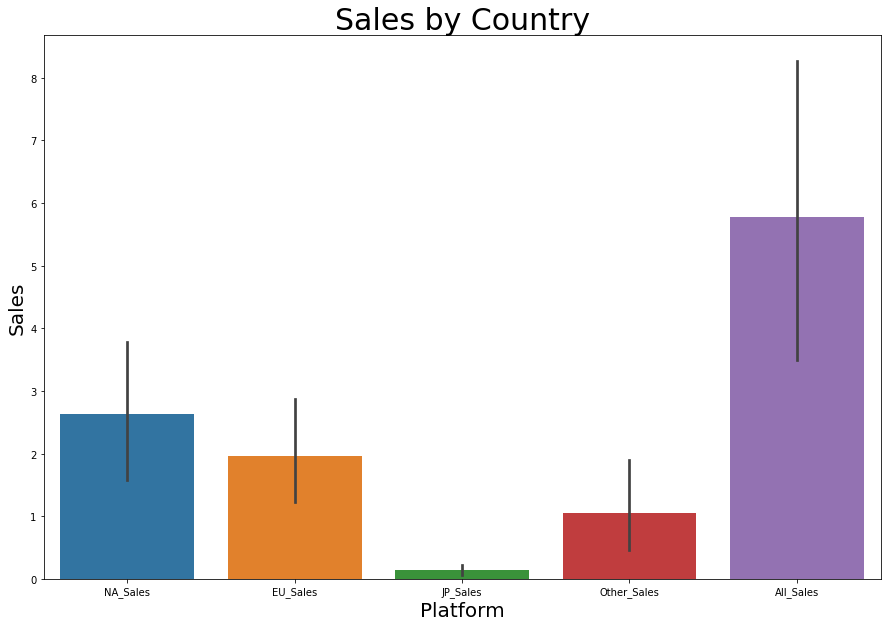

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Sales by Country", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.barplot(data=df_gta1);